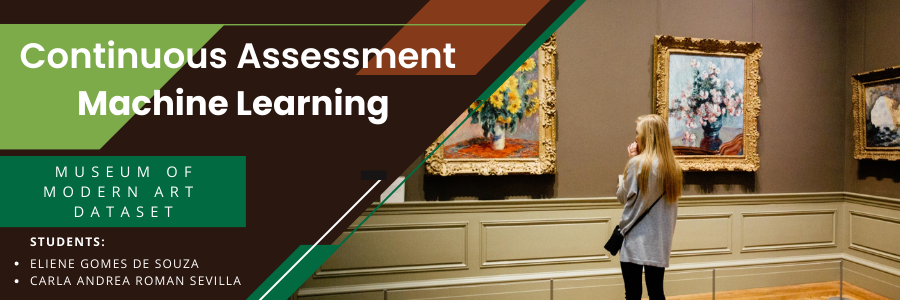

# 1. Importing libraries and dataset

In [126]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [127]:
#Importing artwork and artist dataset
artwork_df = pd.read_csv('artworks.csv')
artist_df = pd.read_csv('artists.csv')

# 2. Exploratory Data Analysis

In [128]:
#Visualizaing the first 3 columns
artist_df.head(3)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year
0,1,Robert Arneson,American,Male,1930.0,1992.0
1,2,Doroteo Arnaiz,Spanish,Male,1936.0,NaN
2,3,Bill Arnold,American,Male,1941.0,NaN


In [129]:
#Visualizaing the first 3 columns
artwork_df.head(3)

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN


In [130]:
#Checking size of both dataset
print("artwork dataset shape:", artwork_df.shape)
print("artist dataset shape:", artist_df.shape)

artwork dataset shape: (130262, 21)
artist dataset shape: (15091, 6)


In [131]:
artwork_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130262 entries, 0 to 130261
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Artwork ID          130262 non-null  int64  
 1   Title               130210 non-null  object 
 2   Artist ID           128802 non-null  object 
 3   Name                128802 non-null  object 
 4   Date                127950 non-null  object 
 5   Medium              118343 non-null  object 
 6   Dimensions          118799 non-null  object 
 7   Acquisition Date    124799 non-null  object 
 8   Credit              127192 non-null  object 
 9   Catalogue           130262 non-null  object 
 10  Department          130262 non-null  object 
 11  Classification      130262 non-null  object 
 12  Object Number       130262 non-null  object 
 13  Diameter (cm)       1399 non-null    float64
 14  Circumference (cm)  10 non-null      float64
 15  Height (cm)         111893 non-nul

In [132]:
#Checking Artwork Dataset missing values
artwork_df.isna().sum()

Artwork ID                 0
Title                     52
Artist ID               1460
Name                    1460
Date                    2312
Medium                 11919
Dimensions             11463
Acquisition Date        5463
Credit                  3070
Catalogue                  0
Department                 0
Classification             0
Object Number              0
Diameter (cm)         128863
Circumference (cm)    130252
Height (cm)            18369
Length (cm)           129526
Width (cm)             19259
Depth (cm)            118819
Weight (kg)           129964
Duration (s)          127178
dtype: int64

In [133]:
#Calculating total missing values
artwork_df.isna().sum().sum()

839429

In [134]:
#Checking Artists Dataset missing values
artist_df.isna().sum()

Artist ID          0
Name               0
Nationality     2488
Gender          3072
Birth Year      3854
Death Year     10512
dtype: int64

In [135]:
#Calculating total missing values
artist_df.isna().sum().sum()

19926

# 2.1 Data Cleaning and Feature engineering

In [136]:
# Create a new column in the Artwork dataset for Artist's Name
artwork_df['ArtistName'] = ''

# Loop through each artwork in the Artwork dataset and find the corresponding artist in the Artist dataset
for index, artwork in artwork_df.iterrows():
    artist_id = artwork['Artist ID']
    artist_match = artist_df[artist_df['Artist ID'] == artist_id]
    
    # If the artist is found, extract their name, nationality, and birthdate
    if not artist_match.empty:
        artist_name = artist_match.iloc[0]['DisplayName']
        nationality = artist_match.iloc[0]['Nationality']
        birthdate = artist_match.iloc[0]['BeginDate']
        
        # Update the ArtistName column in the Artwork dataset
        artwork_df.at[index, 'ArtistName'] = artist_name
        
        # Add the artist's nationality and birthdate to the Artwork dataset
        artwork_df.at[index, 'Nationality'] = nationality
        artwork_df.at[index, 'BirthDate'] = birthdate

# Save the merged dataset into a new file
artwork_df.to_csv('MergedArtwork.csv', index=False)

In [137]:
#Importing the new dataset created
merged_df = pd.read_csv('MergedArtwork.csv')
#pd.set_option("display.max_columns", None)

In [138]:
#Visualizing the first 3 rows of merged dataset
merged_df.head(3)

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s),ArtistName
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN,NaN


In [139]:
#Calculating size of merged dataset
merged_df.shape

(130262, 22)

In [140]:
 #Checking missing valus of merged dataset
merged_df.isna().sum()

Artwork ID                 0
Title                     52
Artist ID               1460
Name                    1460
Date                    2312
Medium                 11919
Dimensions             11463
Acquisition Date        5463
Credit                  3070
Catalogue                  0
Department                 0
Classification             0
Object Number              0
Diameter (cm)         128863
Circumference (cm)    130252
Height (cm)            18369
Length (cm)           129526
Width (cm)             19259
Depth (cm)            118819
Weight (kg)           129964
Duration (s)          127178
ArtistName            130262
dtype: int64

In [141]:
 merged_df.isna().sum().sum()

969691

In [142]:
# Converting 'Acquisition Date' column to datetime
merged_df['Acquisition Date'] = pd.to_datetime(merged_df['Acquisition Date'], errors='coerce')

# Splitting 'Acquisition Date'  in Day, Month and Year columns
merged_df['Acq. Day'] =merged_df['Acquisition Date'].dt.day
merged_df['Acq. Month'] = merged_df['Acquisition Date'].dt.month
merged_df['Acq. Year'] = merged_df['Acquisition Date'].dt.year

In [143]:
merged_df.head(5)

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s),ArtistName,Acq. Day,Acq. Month,Acq. Year
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,48.6000,NaN,168.9000,NaN,NaN,NaN,NaN,9.0,4.0,1996.0
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,40.6401,NaN,29.8451,NaN,NaN,NaN,NaN,17.0,1.0,1995.0
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,34.3000,NaN,31.8000,NaN,NaN,NaN,NaN,15.0,1.0,1997.0
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,50.8000,NaN,50.8000,NaN,NaN,NaN,NaN,17.0,1.0,1995.0
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,38.4000,NaN,19.1000,NaN,NaN,NaN,NaN,15.0,1.0,1997.0


In [144]:
# Columns we decide to drop
columns_to_drop = ['Artwork ID', 'Artist ID', 'Object Number', 'Acquisition Date','Diameter (cm)', 'Circumference (cm)', 'Height (cm)', 'Length (cm)', 'Width (cm)', 'Depth (cm)', 'Weight (kg)', 'Duration (s)', 'ArtistName']          
# Dropping the columns
df = merged_df.drop(columns=columns_to_drop)
df.head(3)

,Title,Name,Date,Medium,Dimensions,Credit,Catalogue,Department,Classification,Acq. Day,Acq. Month,Acq. Year
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,Y,Architecture & Design,Architecture,9.0,4.0,1996.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,Y,Architecture & Design,Architecture,17.0,1.0,1995.0
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,Y,Architecture & Design,Architecture,15.0,1.0,1997.0


In [145]:
#Reordering columns
reorder_columns = ['Name', 'Date', 'Title', 'Medium', 'Dimensions', 'Acq. Day', 'Acq. Month', 'Acq. Year', 'Credit', 'Department', 'Classification', 'Catalogue']  
df = df[reorder_columns]
df.head(2)

,Name,Date,Title,Medium,Dimensions,Acq. Day,Acq. Month,Acq. Year,Credit,Department,Classification,Catalogue
0,Otto Wagner,1896,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",9.0,4.0,1996.0,Fractional and promised gift of Jo Carole and ...,Architecture & Design,Architecture,Y
1,Christian de Portzamparc,1987,"City of Music, National Superior Conservatory ...",Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",17.0,1.0,1995.0,Gift of the architect in honor of Lily Auchinc...,Architecture & Design,Architecture,Y


In [146]:
df.describe()

,Acq. Day,Acq. Month,Acq. Year
count,124798.000000,124798.000000,124798.000000
mean,11.986194,6.897779,1983.530722
std,7.314030,3.700972,22.488423
min,1.000000,1.000000,1929.000000
25%,6.000000,4.000000,1965.000000
50%,10.000000,6.000000,1983.000000
75%,17.000000,10.000000,2006.000000
max,31.000000,12.000000,2016.000000


In [147]:
#Checking missing values after we dropped features
df.isna().sum()

Name               1460
Date               2312
Title                52
Medium            11919
Dimensions        11463
Acq. Day           5464
Acq. Month         5464
Acq. Year          5464
Credit             3070
Department            0
Classification        0
Catalogue             0
dtype: int64

In [148]:
#Checking total missing values
df.isna().sum().sum()

46668

In [149]:
# Specify the columns to filter
columns_to_filter = ['Title', 'Name', 'Date', 'Medium', 'Dimensions', 'Credit', 'Acq. Day', 'Acq. Month', 'Acq. Year']

# Filter out records with missing values in the specified columns
df_filtered = df.dropna(subset=columns_to_filter)

# Display the modified DataFrame
df_filtered.head()

,Name,Date,Title,Medium,Dimensions,Acq. Day,Acq. Month,Acq. Year,Credit,Department,Classification,Catalogue
0,Otto Wagner,1896,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",9.0,4.0,1996.0,Fractional and promised gift of Jo Carole and ...,Architecture & Design,Architecture,Y
1,Christian de Portzamparc,1987,"City of Music, National Superior Conservatory ...",Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",17.0,1.0,1995.0,Gift of the architect in honor of Lily Auchinc...,Architecture & Design,Architecture,Y
2,Emil Hoppe,1903,"Villa near Vienna Project, Outside Vienna, Aus...","Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",15.0,1.0,1997.0,Gift of Jo Carole and Ronald S. Lauder,Architecture & Design,Architecture,Y
3,Bernard Tschumi,1980,"The Manhattan Transcripts Project, New York, N...",Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",17.0,1.0,1995.0,Purchase and partial gift of the architect in ...,Architecture & Design,Architecture,Y
4,Emil Hoppe,1903,"Villa, project, outside Vienna, Austria, Exter...","Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",15.0,1.0,1997.0,Gift of Jo Carole and Ronald S. Lauder,Architecture & Design,Architecture,Y


In [150]:
df_filtered.isna().sum()

Name              0
Date              0
Title             0
Medium            0
Dimensions        0
Acq. Day          0
Acq. Month        0
Acq. Year         0
Credit            0
Department        0
Classification    0
Catalogue         0
dtype: int64

In [151]:
df_filtered.shape

(100767, 12)

In [152]:
df["Classification"].value_counts()

Print                             30807
Photograph                        29909
Illustrated Book                  26160
Drawing                           11735
Design                            11223
Mies van der Rohe Archive          3331
Architecture                       2947
Video                              2363
Film                               2292
Painting                           2270
Sculpture                          1669
Multiple                           1030
(not assigned)                     1029
Frank Lloyd Wright Archive          785
Periodical                          741
Installation                        596
Work on Paper                       436
Audio                               429
Media                               343
Ephemera                             89
Textile                              33
Performance                          24
Collage                               9
Photography Research/Reference        4
Software                              3


<AxesSubplot:>

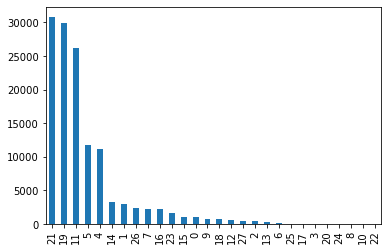

In [193]:
df['Classification'].value_counts().plot(kind='bar')

In [153]:
df["Department"].value_counts()

Prints & Illustrated Books               60128
Photography                              29161
Architecture & Design                    18269
Drawings                                 11027
Painting & Sculpture                      3806
Film                                      3088
Media and Performance Art                 2627
Fluxus Collection                         2135
Architecture & Design - Image Archive       21
Name: Department, dtype: int64

In [ ]:
sns.pairplot(data=df,hue='Classification')

# 3. Machine Learning Models

# 3.1 Naive Bayes on 'Classification' and 'Department' features

In [154]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 3.1.1 Training split :10

In [155]:
# Selecting features
selected_features = ['Name', 'Medium']
target_classification = 'Classification'
target_department = 'Department'

In [156]:
label_encoder = LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['Classification'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Medium'] = label_encoder.fit_transform(df['Medium'])

In [157]:
# Split  into training and testing sets
X_train, X_test, y_train_classification, y_test_classification, y_train_department, y_test_department = train_test_split(
    df[selected_features], df[target_classification], df[target_department], test_size=0.10, random_state=42)

In [158]:
# Train a Naive Bayes model for artwork classification
classification_model = GaussianNB()
classification_model.fit(X_train, y_train_classification)

GaussianNB()

In [159]:
# Make predictions on the testing set for artwork classification
classification_predictions = classification_model.predict(X_test)

In [160]:
# Calculate evaluation metrics for artwork classification
classification_accuracy = accuracy_score(y_test_classification, classification_predictions)
classification_precision = precision_score(y_test_classification, classification_predictions, average='weighted')
classification_recall = recall_score(y_test_classification, classification_predictions, average='weighted')
classification_f1 = f1_score(y_test_classification, classification_predictions, average='weighted')

print("Artwork Classification Accuracy:", classification_accuracy)
print("Artwork Classification Precision:", classification_precision)
print("Artwork Classification Recall:", classification_recall)
print("Artwork Classification F1 Score:", classification_f1)

Artwork Classification Accuracy: 0.4416980118216013
Artwork Classification Precision: 0.30453802946001285
Artwork Classification Recall: 0.4416980118216013
Artwork Classification F1 Score: 0.35489114497632485


In [161]:
# Train a Naive Bayes model for artwork department
department_model = GaussianNB()
department_model.fit(X_train, y_train_department)

GaussianNB()

In [162]:
# Make predictions on the testing set for artwork department
department_predictions = department_model.predict(X_test)

In [163]:
# Calculate evaluation metrics for artwork department
department_accuracy = accuracy_score(y_test_department, department_predictions)
department_precision = precision_score(y_test_department, department_predictions, average='weighted')
department_recall = recall_score(y_test_department, department_predictions, average='weighted')
department_f1 = f1_score(y_test_department, department_predictions, average='weighted')

print("Artwork Department Accuracy:", department_accuracy)
print("Artwork Department Precision:", department_precision)
print("Artwork Department Recall:", department_recall)
print("Artwork Department F1 Score:", department_f1)

Artwork Department Accuracy: 0.4820756889537115
Artwork Department Precision: 0.3327605794611479
Artwork Department Recall: 0.4820756889537115
Artwork Department F1 Score: 0.3936570252505467


In [164]:
# Cross-validation
classification_cv_scores = cross_val_score(classification_model, df[selected_features], df[target_classification], cv=5)
department_cv_scores = cross_val_score(department_model, df[selected_features], df[target_department], cv=5)

print("Artwork Classification Cross-Validation Scores:", classification_cv_scores)
print("Artwork Department Cross-Validation Scores:", department_cv_scores)

Artwork Classification Cross-Validation Scores: [0.42405865 0.4285495  0.50948104 0.46399509 0.39432673]
Artwork Department Cross-Validation Scores: [0.52903696 0.4933405  0.44019653 0.45723937 0.45958084]


## 3.1.2 Training split :20

In [73]:
# Selecting features
selected_features = ['Name', 'Medium']
target_classification = 'Classification'
target_department = 'Department'

In [74]:
label_encoder = LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['Classification'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Medium'] = label_encoder.fit_transform(df['Medium'])

In [75]:
# Split  into training and testing sets
X_train, X_test, y_train_classification, y_test_classification, y_train_department, y_test_department = train_test_split(
    df[selected_features], df[target_classification], df[target_department], test_size=0.20, random_state=42)

In [76]:
# Train a Naive Bayes model for artwork classification
classification_model = GaussianNB()
classification_model.fit(X_train, y_train_classification)

GaussianNB()

In [77]:
# Make predictions on the testing set for artwork classification
classification_predictions = classification_model.predict(X_test)

In [78]:
# Calculate evaluation metrics for artwork classification
classification_accuracy = accuracy_score(y_test_classification, classification_predictions)
classification_precision = precision_score(y_test_classification, classification_predictions, average='weighted')
classification_recall = recall_score(y_test_classification, classification_predictions, average='weighted')
classification_f1 = f1_score(y_test_classification, classification_predictions, average='weighted')

print("Artwork Classification Accuracy:", classification_accuracy)
print("Artwork Classification Precision:", classification_precision)
print("Artwork Classification Recall:", classification_recall)
print("Artwork Classification F1 Score:", classification_f1)

Artwork Classification Accuracy: 0.44313514758377154
Artwork Classification Precision: 0.30416322956322817
Artwork Classification Recall: 0.44313514758377154
Artwork Classification F1 Score: 0.35528903868173733


In [79]:
# Train a Naive Bayes model for artwork department
department_model = GaussianNB()
department_model.fit(X_train, y_train_department)

GaussianNB()

In [80]:
# Make predictions on the testing set for artwork department
department_predictions = department_model.predict(X_test)

In [81]:
# Calculate evaluation metrics for artwork department
department_accuracy = accuracy_score(y_test_department, department_predictions)
department_precision = precision_score(y_test_department, department_predictions, average='weighted')
department_recall = recall_score(y_test_department, department_predictions, average='weighted')
department_f1 = f1_score(y_test_department, department_predictions, average='weighted')

print("Artwork Department Accuracy:", department_accuracy)
print("Artwork Department Precision:", department_precision)
print("Artwork Department Recall:", department_recall)
print("Artwork Department F1 Score:", department_f1)

Artwork Department Accuracy: 0.4791386788469658
Artwork Department Precision: 0.3291321803974505
Artwork Department Recall: 0.4791386788469658
Artwork Department F1 Score: 0.3901880204836952


In [82]:
# Cross-validation
classification_cv_scores = cross_val_score(classification_model, df[selected_features], df[target_classification], cv=5)
department_cv_scores = cross_val_score(department_model, df[selected_features], df[target_department], cv=5)

print("Artwork Classification Cross-Validation Scores:", classification_cv_scores)
print("Artwork Department Cross-Validation Scores:", department_cv_scores)

Artwork Classification Cross-Validation Scores: [0.42405865 0.4285495  0.50948104 0.46399509 0.39432673]
Artwork Department Cross-Validation Scores: [0.52903696 0.4933405  0.44019653 0.45723937 0.45958084]


## 3.1.2 Training split :30

In [83]:
# Selecting features
selected_features = ['Name', 'Medium']
target_classification = 'Classification'
target_department = 'Department'

In [84]:
label_encoder = LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['Classification'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Medium'] = label_encoder.fit_transform(df['Medium'])

In [85]:
# Split  into training and testing sets
X_train, X_test, y_train_classification, y_test_classification, y_train_department, y_test_department = train_test_split(
    df[selected_features], df[target_classification], df[target_department], test_size=0.30, random_state=42)

In [86]:
# Train a Naive Bayes model for artwork classification
classification_model = GaussianNB()
classification_model.fit(X_train, y_train_classification)

GaussianNB()

In [87]:
# Make predictions on the testing set for artwork classification
classification_predictions = classification_model.predict(X_test)

In [88]:
# Calculate evaluation metrics for artwork classification
classification_accuracy = accuracy_score(y_test_classification, classification_predictions)
classification_precision = precision_score(y_test_classification, classification_predictions, average='weighted')
classification_recall = recall_score(y_test_classification, classification_predictions, average='weighted')
classification_f1 = f1_score(y_test_classification, classification_predictions, average='weighted')

print("Artwork Classification Accuracy:", classification_accuracy)
print("Artwork Classification Precision:", classification_precision)
print("Artwork Classification Recall:", classification_recall)
print("Artwork Classification F1 Score:", classification_f1)

Artwork Classification Accuracy: 0.44433071470610813
Artwork Classification Precision: 0.30438841968360064
Artwork Classification Recall: 0.44433071470610813
Artwork Classification F1 Score: 0.3563530734128893


In [89]:
# Train a Naive Bayes model for artwork department
department_model = GaussianNB()
department_model.fit(X_train, y_train_department)

GaussianNB()

In [90]:
# Make predictions on the testing set for artwork department
department_predictions = department_model.predict(X_test)

In [91]:
# Calculate evaluation metrics for artwork department
department_accuracy = accuracy_score(y_test_department, department_predictions)
department_precision = precision_score(y_test_department, department_predictions, average='weighted')
department_recall = recall_score(y_test_department, department_predictions, average='weighted')
department_f1 = f1_score(y_test_department, department_predictions, average='weighted')

print("Artwork Department Accuracy:", department_accuracy)
print("Artwork Department Precision:", department_precision)
print("Artwork Department Recall:", department_recall)
print("Artwork Department F1 Score:", department_f1)

Artwork Department Accuracy: 0.4771360577292152
Artwork Department Precision: 0.326902997112749
Artwork Department Recall: 0.4771360577292152
Artwork Department F1 Score: 0.3879803151546988


In [92]:
# Cross-validation
classification_cv_scores = cross_val_score(classification_model, df[selected_features], df[target_classification], cv=5)
department_cv_scores = cross_val_score(department_model, df[selected_features], df[target_department], cv=5)

print("Artwork Classification Cross-Validation Scores:", classification_cv_scores)
print("Artwork Department Cross-Validation Scores:", department_cv_scores)

Artwork Classification Cross-Validation Scores: [0.42405865 0.4285495  0.50948104 0.46399509 0.39432673]
Artwork Department Cross-Validation Scores: [0.52903696 0.4933405  0.44019653 0.45723937 0.45958084]


# 3.2 Appyling Random Forest on 'Classification' and 'Department' features

In [93]:
#Applying necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 3.2.1 Training split :10

In [95]:
# Selecting relevant features: 'Artist', 'Medium', 'Classification', 'Department'
selected_features = ['Name', 'Medium']
target_classification = 'Classification'
target_department = 'Department'

In [96]:
# Encoding categorical features
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Medium'] = label_encoder.fit_transform(df['Medium'])

In [97]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train_classification, y_test_classification, y_train_department, y_test_department = train_test_split(
    df[selected_features], df[target_classification], df[target_department], test_size=0.1, random_state=42)

In [98]:
# Trainning a Random Forest Classifier to predict artwork classification
classification_model = RandomForestClassifier()
classification_model.fit(X_train, y_train_classification)

RandomForestClassifier()

In [99]:
# Predictions on the testing set for artwork classification
classification_predictions = classification_model.predict(X_test)

In [100]:
#Printing accuracy, precision, recall and F1 Score results for 'Classification' feature
classification_accuracy = accuracy_score(y_test_classification, classification_predictions)
classification_precision = precision_score(y_test_classification, classification_predictions, average='weighted')
classification_recall = recall_score(y_test_classification, classification_predictions, average='weighted')
classification_f1 = f1_score(y_test_classification, classification_predictions, average='weighted')

print("Artwork Classification Accuracy:", classification_accuracy)
print("Artwork Classification Precision:", classification_precision)
print("Artwork Classification Recall:", classification_recall)
print("Artwork Classification F1 Score:", classification_f1)

Artwork Classification Accuracy: 0.9257695555384969
Artwork Classification Precision: 0.9250464462754279
Artwork Classification Recall: 0.9257695555384969
Artwork Classification F1 Score: 0.9249631966025812


In [101]:
# Trainning a Random Forest Classifier to predict artwork 'Department'
department_model = RandomForestClassifier()
department_model.fit(X_train, y_train_department)

RandomForestClassifier()

In [102]:
# Predictions on the testing set for artwork department
department_predictions = department_model.predict(X_test)

In [103]:
#Printing accuracy, precision, recall and F1 Score results for 'Department' feature
department_accuracy = accuracy_score(y_test_department, department_predictions)
department_precision = precision_score(y_test_department, department_predictions, average='weighted')
department_recall = recall_score(y_test_department, department_predictions, average='weighted')
department_f1 = f1_score(y_test_department, department_predictions, average='weighted')

print("Artwork Department Accuracy:", department_accuracy)
print("Artwork Department Precision:", department_precision)
print("Artwork Department Recall:", department_recall)
print("Artwork Department F1 Score:", department_f1)

Artwork Department Accuracy: 0.949643049051969
Artwork Department Precision: 0.9490636358632685
Artwork Department Recall: 0.949643049051969
Artwork Department F1 Score: 0.949208834210878


In [104]:
# Cross-Validation Scores for 'Department' and 'Classification'
classification_cv_scores = cross_val_score(classification_model, df[selected_features], df[target_classification], cv=5)
department_cv_scores = cross_val_score(department_model, df[selected_features], df[target_department], cv=5)

print("Artwork Classification Cross-Validation Scores:", classification_cv_scores)
print("Artwork Department Cross-Validation Scores:", department_cv_scores)

Artwork Classification Cross-Validation Scores: [0.75008636 0.78647373 0.78807769 0.77556426 0.71687394]
Artwork Department Cross-Validation Scores: [0.81107742 0.85817372 0.87578689 0.83083832 0.75475971]


## 3.2.2 Training split :20

In [105]:
# Selecting relevant features: 'Artist', 'Medium', 'Classification', 'Department'
selected_features = ['Name', 'Medium']
target_classification = 'Classification'
target_department = 'Department'

In [106]:
# Encoding categorical features
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Medium'] = label_encoder.fit_transform(df['Medium'])

In [107]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train_classification, y_test_classification, y_train_department, y_test_department = train_test_split(
    df[selected_features], df[target_classification], df[target_department], test_size=0.2, random_state=42)

In [108]:
# Trainning a Random Forest Classifier to predict artwork classification
classification_model = RandomForestClassifier()
classification_model.fit(X_train, y_train_classification)

RandomForestClassifier()

In [109]:
# Predictions on the testing set for artwork classification
classification_predictions = classification_model.predict(X_test)

In [110]:
#Printing accuracy, precision, recall and F1 Score results for 'Classification' feature
classification_accuracy = accuracy_score(y_test_classification, classification_predictions)
classification_precision = precision_score(y_test_classification, classification_predictions, average='weighted')
classification_recall = recall_score(y_test_classification, classification_predictions, average='weighted')
classification_f1 = f1_score(y_test_classification, classification_predictions, average='weighted')

print("Artwork Classification Accuracy:", classification_accuracy)
print("Artwork Classification Precision:", classification_precision)
print("Artwork Classification Recall:", classification_recall)
print("Artwork Classification F1 Score:", classification_f1)

Artwork Classification Accuracy: 0.9215829271101217
Artwork Classification Precision: 0.9204915741536771
Artwork Classification Recall: 0.9215829271101217
Artwork Classification F1 Score: 0.9205368946314698


In [111]:
# Trainning a Random Forest Classifier to predict artwork 'Department'
department_model = RandomForestClassifier()
department_model.fit(X_train, y_train_department)

RandomForestClassifier()

In [112]:
# Predictions on the testing set for artwork department
department_predictions = department_model.predict(X_test)

In [113]:
#Printing accuracy, precision, recall and F1 Score results for 'Department' feature
department_accuracy = accuracy_score(y_test_department, department_predictions)
department_precision = precision_score(y_test_department, department_predictions, average='weighted')
department_recall = recall_score(y_test_department, department_predictions, average='weighted')
department_f1 = f1_score(y_test_department, department_predictions, average='weighted')

print("Artwork Department Accuracy:", department_accuracy)
print("Artwork Department Precision:", department_precision)
print("Artwork Department Recall:", department_recall)
print("Artwork Department F1 Score:", department_f1)

Artwork Department Accuracy: 0.9463401527655164
Artwork Department Precision: 0.9456731394284432
Artwork Department Recall: 0.9463401527655164
Artwork Department F1 Score: 0.9458661583268319


In [114]:
# Cross-Validation Scores for 'Department' and 'Classification'
classification_cv_scores = cross_val_score(classification_model, df[selected_features], df[target_classification], cv=5)
department_cv_scores = cross_val_score(department_model, df[selected_features], df[target_department], cv=5)

print("Artwork Classification Cross-Validation Scores:", classification_cv_scores)
print("Artwork Department Cross-Validation Scores:", department_cv_scores)

Artwork Classification Cross-Validation Scores: [0.75169846 0.78869996 0.78308767 0.77506525 0.71783356]
Artwork Department Cross-Validation Scores: [0.8113461  0.85802019 0.87762936 0.83571319 0.75030708]


## 3.2.2 Training split :30

In [ ]:
# Selecting relevant features: 'Artist', 'Medium', 'Classification', 'Department'
selected_features = ['Name', 'Medium']
target_classification = 'Classification'
target_department = 'Department'

In [ ]:
# Encoding categorical features
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Medium'] = label_encoder.fit_transform(df['Medium'])

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train_classification, y_test_classification, y_train_department, y_test_department = train_test_split(
    df[selected_features], df[target_classification], df[target_department], test_size=0.3, random_state=42)

In [ ]:
# Trainning a Random Forest Classifier to predict artwork classification
classification_model = RandomForestClassifier()
classification_model.fit(X_train, y_train_classification)

In [ ]:
# Predictions on the testing set for artwork classification
classification_predictions = classification_model.predict(X_test)

In [ ]:
#Printing accuracy, precision, recall and F1 Score results for 'Classification' feature
classification_accuracy = accuracy_score(y_test_classification, classification_predictions)
classification_precision = precision_score(y_test_classification, classification_predictions, average='weighted')
classification_recall = recall_score(y_test_classification, classification_predictions, average='weighted')
classification_f1 = f1_score(y_test_classification, classification_predictions, average='weighted')

print("Artwork Classification Accuracy:", classification_accuracy)
print("Artwork Classification Precision:", classification_precision)
print("Artwork Classification Recall:", classification_recall)
print("Artwork Classification F1 Score:", classification_f1)

In [ ]:
# Trainning a Random Forest Classifier to predict artwork 'Department'
department_model = RandomForestClassifier()
department_model.fit(X_train, y_train_department)

In [ ]:
# Predictions on the testing set for artwork department
department_predictions = department_model.predict(X_test)

In [ ]:
#Printing accuracy, precision, recall and F1 Score results for 'Department' feature
department_accuracy = accuracy_score(y_test_department, department_predictions)
department_precision = precision_score(y_test_department, department_predictions, average='weighted')
department_recall = recall_score(y_test_department, department_predictions, average='weighted')
department_f1 = f1_score(y_test_department, department_predictions, average='weighted')

print("Artwork Department Accuracy:", department_accuracy)
print("Artwork Department Precision:", department_precision)
print("Artwork Department Recall:", department_recall)
print("Artwork Department F1 Score:", department_f1)

In [ ]:
# Cross-Validation Scores for 'Department' and 'Classification'
classification_cv_scores = cross_val_score(classification_model, df[selected_features], df[target_classification], cv=5)
department_cv_scores = cross_val_score(department_model, df[selected_features], df[target_department], cv=5)

print("Artwork Classification Cross-Validation Scores:", classification_cv_scores)
print("Artwork Department Cross-Validation Scores:", department_cv_scores)

In [189]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, accuracy_score, auc

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (2).

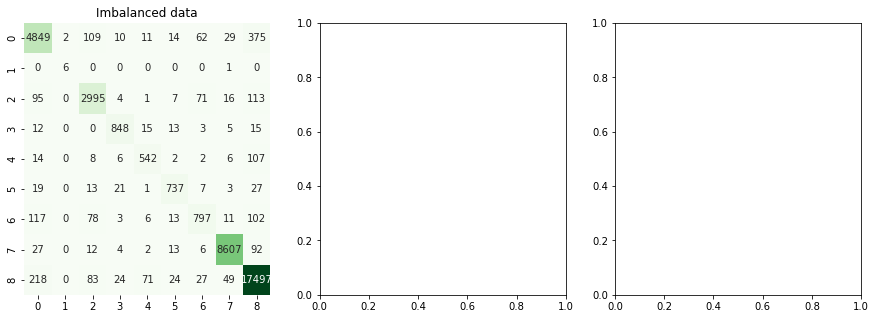

In [192]:
#Plotting Confusion Matrix
fig, ax = plt.subplots(1,3,figsize=(15,5))
labels=['Normal Bids','Anomalous Bids']

sns.heatmap(confusion_matrix(y_test_department, department_predictions), annot=True, cmap="Greens", fmt='g', cbar=False,ax=ax[0])
ax[0].set_title('Imbalanced data')
ax[0].set_yticklabels(labels);
ax[0].set_xticklabels(labels);
ax[0].set_ylabel('Test')
ax[0].set_xlabel('Fraud: Predicted')

sns.heatmap(confusion_matrix(y_test_department, department_predictions), annot=True, cmap="Greens", fmt='g', cbar=False,ax=ax[1])
ax[1].set_title('Undersampling data')
ax[1].set_yticklabels(labels);
ax[1].set_xticklabels(labels);
ax[1].set_ylabel('Test')
ax[1].set_xlabel('Fraud: Predicted')

sns.heatmap(confusion_matrix(y_test_department, department_predictions_3), annot=True, cmap="Greens", fmt='g', cbar=False, ax=ax[2])
ax[2].set_title('Oversampling data')
ax[2].set_xticklabels(labels);
ax[2].set_yticklabels(labels);
ax[2].set_ylabel('Test')
ax[2].set_xlabel('Fraud: Predicted')
plt.tight_layout()

plt.show()
